# Spatial distributions and correlation: heatmaps

This exercise is inspired by the blog post [Dungeons & Data](https://peritract.github.io/2020/05/14/dungeons-and-data/) written by Dan Keefe in 2020. As an extra exercise when you've finished this course, have a look through the attached [Jupyter notebooks](https://github.com/Peritract/data-projects/tree/master/dungeons-and-data) to practise building a whole suite of different plots. The data used has been pulled from the [Dungeons and Dragons 5th edition API](https://www.dnd5eapi.co/), with a little bit of data-wrangling to get it into a nice format for the sake of this tutorial.

This dataset contains stats for a range of D & D monsters. Each monster has the following parameters associated with them:

| Parameter | Description |
|:--|:--|
| AC | Armour class |
| HP | Hit Points |
| Str | Strength |
| Dex | Dexterity |
| Con | Constitution |
| Int | Intelligence |
| Wis | Wisdom |
| Cha | Charisma |
| CR | Challenge Rating |

Essentially, we want to figure out if there is a strong correlation, either positive or negative, between any of these stats.


As a little extra challenge at the end of this section, we also show how to load in an image and plot it using a colour map; this is useful for `.tiff` images from microscopy, maps, DEMs... any very easy to do!



## Download the data

This is the only tutorial that doesn't include randomly generated data, or data available as an example with a library, to make sure that at least once you have to load in data manually.

You can run this command from Colab:

```bash
!wget https://raw.githubusercontent.com/ARCTraining/data-vis/main/data_downloads/monsters_stats.csv
```

Alternatively, you can visit the [GitHub repository](https://github.com/ARCTraining/data-vis/blob/main/data_downloads/monsters_stats.csv) and click on the download button, save to your machine, then upload to Colab.


In [1]:
# download the data
!wget https://raw.githubusercontent.com/ARCTraining/data-vis/main/data_downloads/monsters_stats.csv

--2024-09-20 14:30:21--  https://raw.githubusercontent.com/ARCTraining/data-vis/main/data_downloads/monsters_stats.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23117 (23K) [text/plain]
Saving to: ‘monsters_stats.csv’

monsters_stats.csv  100%[===================>]  22.58K  --.-KB/s    in 0.003s  

2024-09-20 14:30:21 (7.66 MB/s) - ‘monsters_stats.csv’ saved [23117/23117]



### Cmocean colour maps

For this example, we're going to also install an extra Python package that will give you access to more colour maps: [cmocean](https://matplotlib.org/cmocean/).

If you try *importing* cmocean, you will get an error message something like this:

```python
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-21-99fef696d6c8> in <cell line: 1>()
----> 1 import cmocean

ModuleNotFoundError: No module named 'cmocean'

---------------------------------------------------------------------------
NOTE: If your import is failing due to a missing package, you can
manually install dependencies using either !pip or !apt.

To view examples of installing some common dependencies, click the
"Open Examples" button below.
---------------------------------------------------------------------------
```

As explained in the error message, this module is not one available by default in Colab, so you need to install it. This is very simple. All we need to do is use `!` to access the underlying terminal on our cloud machine:

```bash
!pip install cmocean
```

You will get output something like this if it is successful:

```bash
Collecting cmocean
  Downloading cmocean-3.1.3-py3-none-any.whl (222 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 5.5 MB/s eta 0:00:00

>> Lots of dependencies...

Installing collected packages: cmocean
Successfully installed cmocean-3.1.3
```

You can now import cmocean alongside the other packages we need for this section:

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
```

Now in addition to all the [Matplotlib colour maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) and [Seaborn colour maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html), you now have access to [Cmocean colour maps](https://matplotlib.org/cmocean/).

When plotting, you usually define the colourmap inside the plotting function with the `cmap` argument. For the main names Matplotlib colour maps, you can just use their name, so `cmap="plasma"`. For Seaborn colour maps, it's slightly more text: `cmap=sns.color_palette("rocket", as_cmap=True)`; you give the name of the *palette* ("rocket") and then say you want it *as a colour map*. For cmocean, you just need to prefix the colour map name with `"cmo."`: `cmap="cmo.curl"`. This may be a little confusing now, but we will have lots of practise in this section!

In [8]:
!pip install cmocean

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 4.7 MB/s eta 0:00:00


In [9]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean

## Load in the data

Now you're ready to load in the data:

```python
monsters = pd.read_csv("/content/monsters_stats.csv", index_col=0)
```

Use the file explorer and some of the DataFrame exploration tools to see what this looks like: you can double click the csv file itself in the file explorer on the left had side, or after loading the data you can simply call `monsters` in an empty cell to get a preview.

In [3]:
# using pandas to load in the data as a data frame object

monsters = pd.read_csv("/content/monsters_stats.csv", index_col=0)

## Calculating correlation

In order to make a correlation matrix, we need to calculate the correlation between each parameter! Thankfully, this is very easy using the pandas function `corr`:

```python
corr = monsters.corr(numeric_only=True)
```

If you have a look at `corr`, you'll see we essentially already have a correlation matrix in its basic table form. Have a look at the [`corr` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

In [4]:
# calculate correlation

corr = monsters.corr(numeric_only=True)

## Basic heatmap in seaborn

Now we can plot a basic heatmap using this correlation matrix. Let's start with the default settings, and build up from there.

```python
fig, ax = plt.subplots()
sns.heatmap(corr, ax=ax)
```


<Axes: >

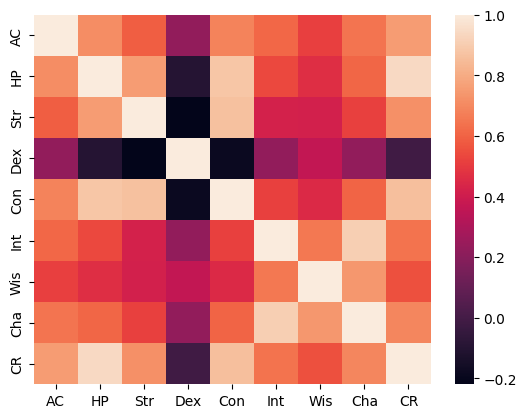

In [5]:
# a quick correlation matrix with only default values
fig, ax = plt.subplots()
sns.heatmap(corr, ax=ax)

Nice, but we have a bit of work before it's finished. Remember that any arguments inside a function that have a default value (so use a `=`) can be given in any order.


### Annotations

It's currently a little bit hard to read off values accurately, so lets add back in the elements of the table version that were useful: having the actual values printed out. These can be added as annotations:

```python
sns.heatmap(corr, annot=True, ax=ax)
```

Note that seaborn will automatically adjust the font colour to suit the background colour.

<Axes: >

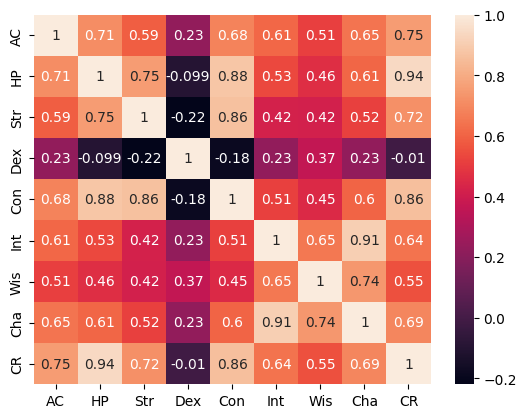

In [6]:
# add annotations
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, ax=ax)

### Centering the heatmap

Before we start picking out a sensible heatmap, lets centre it on zero:

```python
sns.heatmap(corr, annot=True, center=0, ax=ax)
```

Note that is is done slightly differently than when wee used the cmocean heatmap.

<Axes: >

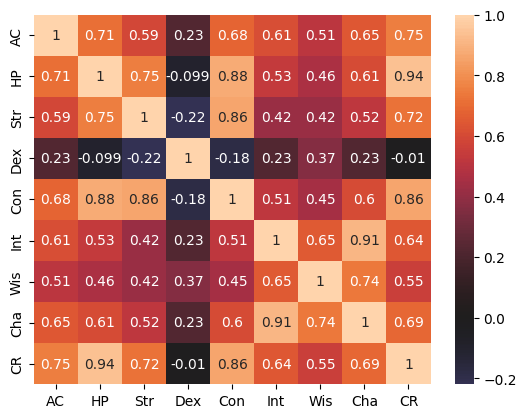

In [7]:
# scale the colour map
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, center=0, ax=ax)

### Picking a heatmap

Find a nice (and scientifically valid) colour map:

- [Matplotlib colour maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
- [Seaborn colour maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
- [Cmocean colour maps](https://matplotlib.org/cmocean/)

I'm going to use the cmocean map "curl":

```python
sns.heatmap(corr, annot=True, cmap="cmo.curl", center=0, ax=ax)
```

<Axes: >

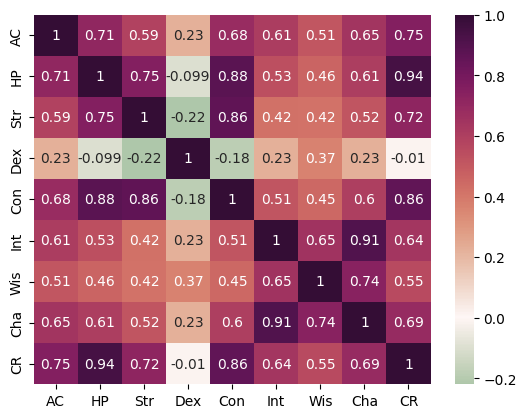

In [10]:
# choose a different colour map
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, center=0, ax=ax, cmap="cmo.curl",)

### Masking the top half

The correlation matrix is looking pretty great already, but it could be even more readable if we simplified it. There is symmetry around the diagonal, so we can just remove the top half to make it less busy and easier to read.

We can do this by creating a `mask` and then passing this as an argument to the `heatmap` function. We want to create a mask that hides the upper triangle of the matrix, but keeps the diagonal. This requires two lines of code that are a bit dense, but we'll work through them step-by-step.

```python
mask = np.triu(np.ones_like(corr, dtype=bool))
```

When we have functions inside functions like the line above, we always start with the inside function, like you would if working through a maths problem.

- The innermost function is `np.ones_like(corr, dtype=bool)`. the `np.ones_like()` function creates an array of ones in the shape of an array that already exists - in this case `corr`, our correlation matrix. The second argument, `dtype` is set to `bool`, meaning that instead of being filled with the digit `1`, the array will be filled with the Boolean equivalent, `True`.
- The output of the inner function, an array the same shape as `corr` but filled with the value `True` is then passed to the outer function, `np.triu`
- The outer function `np.triu` function is used to get the upper (`u`) triangle (`tri`) of an array. It returns a copy of the array with everything below the diagonal set to zero or `False`, depending on the data type.

Your end result mask should look something like this:

```python
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])
```

The entire upper triangle that we want to mask is set to `True`. All we need to do now is set the diagonal to `False`:

```python
np.fill_diagonal(mask, False)
```

This function takes an array (`mask`) and fills the diagonal in place with the value given, in this case `False`.

We now have our mask that we can pass to the heatmap function:

```python
sns.heatmap(corr, annot=True, cmap="cmo.curl", center=0, mask=mask, ax=ax)
```


<Axes: >

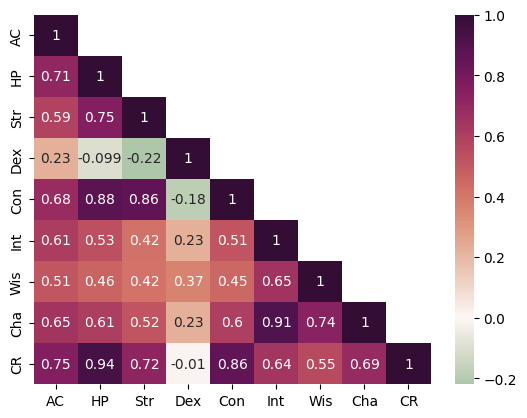

In [12]:
# Mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, center=0, ax=ax, cmap="cmo.curl",
            mask=mask)

### Add some labels

Of course, labels and titles are essential; we need to add an overall title and give the colour bar a label.

```python
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, cmap="cmo.curl", center=0, mask=mask, ax=ax, cbar_kws={'label': 'Pearson Correlation Coefficient'})
ax.set_title("D&D Monster Stats")
```

Text(0.5, 1.0, 'D&D Monster Stats')

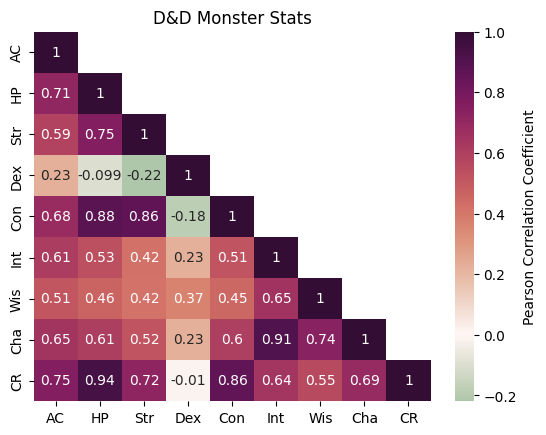

In [13]:
# add labels
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, center=0, ax=ax, cmap="cmo.curl",
            mask=mask,
            cbar_kws={'label': 'Pearson Correlation Coefficient'})

ax.set_title("D&D Monster Stats")

## Fix weird layout issues

The spacing on this plot might look a little funky (depending on the values of the annotations), with some of the annotations squeezing into neighbouring cells. This can be tackled with the magical argument `constrained_layout=True`, which fixes everything:

```python
fig, ax = plt.subplots(constrained_layout=True)
```


Text(0.5, 1.0, 'D&D Monster Stats')

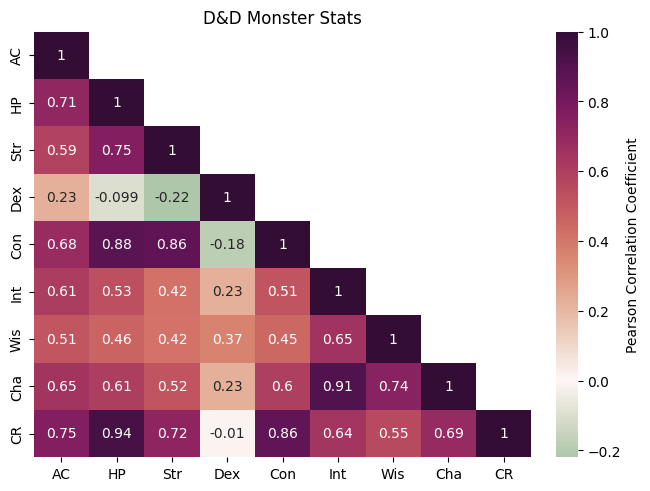

In [14]:
# constrained layout
fig, ax = plt.subplots(constrained_layout=True)
sns.heatmap(corr, annot=True, cmap="cmo.curl", center=0, mask=mask, ax=ax, cbar_kws={'label': 'Pearson Correlation Coefficient'})
ax.set_title("D&D Monster Stats")

## Challenges

Now that you've loaded this dataset in, lets do some challenges. For this session, this section is a little bit different - instead of trying to recreate similar plots, to the correlation matrix, lets see if you can plot this dataset in different ways.

Some useful things to know about grouping the data:

- [Str, Dex, Con, Int, Wis, Cha] are a subset of stats that could be plotted together, separate from HP, AC and CR
- Looking at two stats/a subgroup of stats that have significant correlation in more detail might be useful
- To select a subset of the dataframe, you can use square brackets: `monsters[["Cha", "Dex", "Str"]]` will return a cut-down version of the dataframe with only the columns listed
- You can collect any column into bins using the pandas [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), and then save this as a new column in the dataframe:`monsters["CR bins"] = pd.cut(monsters["CR"], 3, include_lowest=True)`

Here's a quick [reminder of how seaborn works](https://seaborn.pydata.org/tutorial/introduction.html).

Some fun plots to try:

- [Scatterplot matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html) - note that this might take *a while* to plot!
- [Stacked histogram](https://seaborn.pydata.org/examples/histogram_stacked.html)
- [Jointplot](https://seaborn.pydata.org/examples/regression_marginals.html)
- [Violin plot](https://seaborn.pydata.org/tutorial/introduction.html#plots-for-categorical-data)